In [38]:
import pandas as pd
import numpy as nm



In [61]:
df=pd.read_csv('Titanic-Dataset.csv')
print(df.columns.tolist())





['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [72]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(3), int64(5), object(3)
memory usage: 78.4+ KB
None
       PassengerId    Survived      Pclass  Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  0.0  714.000000  891.000000   
mean    446.000000    0.383838    2.30

In [55]:
if 'Age' in df.columns:
    df['Age']= df['Age'].fillna(df['Age'].median())
    print("\nMissing values in 'Age' filled with median.")

if 'Embarked' in df.columns:
    df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])
    print("Missing values in 'Embarked' filled with mode.")

df.drop(columns=['Cabin'], inplace=True, errors='ignore')
print("Dropped 'Cabin' column if it existed.")






Missing values in 'Age' filled with median.
Dropped 'Cabin' column if it existed.


In [65]:
if 'Sex' in df.columns:
   
    df['Sex'] = df['Sex'].astype(str).str.strip().str.lower()
    
   
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
   
    print("Nulls in 'Sex':", df['Sex'].isnull().sum())

Nulls in 'Sex': 891


In [74]:
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    print("Embarked column encoded.")
else:
    print("'Embarked' already encoded or not present.")


'Embarked' already encoded or not present.


In [58]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age' ,'Fare']
numeric_cols = [col for col in numeric_cols if col in  df.columns]
print("\nNumeric columns to scale:", numeric_cols)

scaler = StandardScaler()
df[numeric_cols] = scaler .fit_transform(df[numeric_cols])
print("\nAfter Standardization:\n", df[numeric_cols].head())


Numeric columns to scale: ['Age', 'Fare']

After Standardization:
         Age      Fare
0 -0.685003 -0.761026
2 -0.205275 -0.690011
4  0.874111 -0.676860
5  0.034588 -0.633904
8 -0.085343 -0.352475


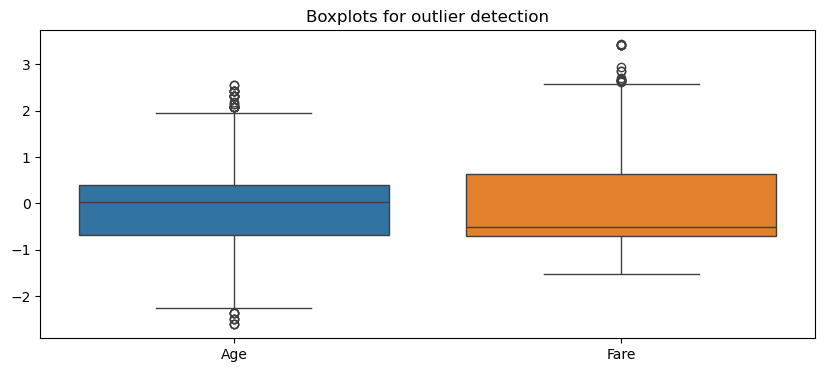


Detecting and removing outliers:
 - Age: 38 rows removed
 - Fare: 24 rows removed

Final shape of DataFrame: (576, 12)

Final column names:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S']

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
4            5         0       3   
5            6         0       3   
8            9         1       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris  NaN -0.685003      1   
2                             Heikkinen, Miss. Laina  NaN -0.205275      0   
4                           Allen, Mr. William Henry  NaN  0.874111      0   
5                                   Moran, Mr. James  NaN  0.034588      0   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  NaN -0.085343      0   

   Parch            Ticket      

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots for outlier detection")
plt.show()

before_rows = df.shape[0]

print("\nDetecting and removing outliers:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 =  df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    rows_before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    rows_after = df.shape[0]
    print(f" - {col}: {rows_before - rows_after} rows removed")


print("\nFinal shape of DataFrame:", df.shape)
print("\nFinal column names:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

In [60]:
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S']
